# LTA DataMall API User Guide

Reference document url: https://datamall.lta.gov.sg/content/dam/datamall/datasets/LTA_DataMall_API_User_Guide.pdf

In [1]:
import os,sys
#PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
#sys.path.insert(0, PROJECT_PATH)

In [2]:
# Import api key from api_key.py's LTA_API_KEY
from conf.api_key import LTA_API_KEY
from typing import Union, Dict
import pandas as pd
from PIL import Image
from PIL import UnidentifiedImageError
import requests
# Importing the geodesic module from the library 
from geopy.distance import geodesic

In [3]:
def api_query(api_link: str,  agent_id: str, api_key: str, params_dict: Dict = None) -> Union[Dict,None]:
    """Function which executes query via an api link using a provided agent_id as an identifier to avoid rejection of query request

    Args:
        api_link (str): API Link which requests is to be made
        agent_id (str): Id used for request header
        api_key (str): API Key provided
        params_dict (Dict): Dictionary containing parameters to be passed in requests' get method

    Returns:
        Dictionary containing request content. None when exception are encountered.
    """
    req_headers = {"User-agent": agent_id, "AccountKey": api_key, "Content-Type": "application/json"}
    try:
        res = requests.get(url=api_link,
                           params=params_dict,
                           headers=req_headers,
                           timeout=5)
        # Raise if HTTPError occured
        res.raise_for_status()

        # Check the status code before extending the number of posts
        if res.status_code == 200:
            print(f"Request successful with status code {res.status_code}")
            the_json = res.json()
            return the_json
        else:
            print(f"Return unssucessful with status code {res.status_code}")
            return res.status_code

    except requests.exceptions.HTTPError as errh:
        print(errh)
    except requests.exceptions.ConnectionError as errc:
        print(errc)
    except requests.exceptions.Timeout as errt:
        print(errt)
    except requests.exceptions.RequestException as err:
        print(err)
    return None

## List of 27 API URLs provided by LTA Datamall as of 04 Apr 2023 v5.5 Document
|API|URL|Update Frequency|Parameters|Response type|
|---|---|---|---|---|
|Bus Arrival|http://datamall2.mytransport.sg/ltaodataservice/BusArrivalv2|1min|*BusStopCode*;*ServiceNo*|Various Attributes|
|Bus Services|http://datamall2.mytransport.sg/ltaodataservice/BusServices|Ad hoc||Various Attributes|
|Bus Routes|http://datamall2.mytransport.sg/ltaodataservice/BusRoutes|Ad Hoc||Various Attributes|
|Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/BusStops|Ad Hoc||Various Attributes|
|Passenger Volume by Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/Bus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Bus Stops|http://datamall2.mytransport.sg/ltaodataservice/PV/ODBus|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Origin Destination Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/ODTrain|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Passenger Volume By Train Stations|http://datamall2.mytransport.sg/ltaodataservice/PV/Train|Every 15th of mth update prev mth data|*Date*=YYYYMM|Link expiring in 5mins (last 3mths)|
|Taxi Availability|http://datamall2.mytransport.sg/ltaodataservice/Taxi-Availability|1 min||Latitude/Longitude Attribute|
|Taxi Stands|http://datamall2.mytransport.sg/ltaodataservice/TaxiStands|Monthly||Various Attributes|
|Train Service Alerts|http://datamall2.mytransport.sg/ltaodataservice/TrainServiceAlerts|Ad hoc||Various Attributes|
|Carpark Availability(HDB/LTA/URA)|http://datamall2.mytransport.sg/ltaodataservice/CarParkAvailabilityv2|1min||Various Attribute|
|ERP Rates|http://datamall2.mytransport.sg/ltaodataservice/ERPRates|Ad hoc||Various Attribute|
|Estimated Travel Times|http://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes|5mins||Various Attribute|
|Faulty Traffic Lights|http://datamall2.mytransport.sg/ltaodataservice/FaultyTrafficLights|2mins - whenever there are updates||Various Attributes|
|Road Openings|http://datamall2.mytransport.sg/ltaodataservice/RoadOpenings|24 hours -whenever there are updates||Various Attributes|
|Road Works|http://datamall2.mytransport.sg/ltaodataservice/RoadWorks|24 hours -whenever there are updates||Various Attributes|
|Traffic Images|http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2|1 to 5 mins||Link expiring in 5mins|
|Traffic Incidents|http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents|2 mins - whenever there are updates||Various Attributes|
|Traffic Speed Bands|http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands|5 mins||Various Attributes|
|VMS/EMAS|http://datamall2.mytransport.sg/ltaodataservice/VMS|2 mins||Various Attributes|
|Bicycle Parking|http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2|Monthly|*Lat*;*Long*;*Dist*=(Radius in km)|Various Attributes|
|Geospatial|http://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland|Ad hoc|*ID*=Name of Geospatial Layer|Link expiring in 5 mins|
|Facilities Maintenance|http://datamall2.mytransport.sg/ltaodataservice/FacilitiesMaintenace|Ad hoc|*StationCode* (eg. NS1)|Link expiring in 5 mins|
|Platform Crowd Density Real Time|http://datamall2.mytransport.sg/ltaodataservice/PCDForecast|24 hours|*TrainLine* (eg. EWL)|Various Attributes|
|Platform Crowd Density Forecast|http://datamall2.mytransport.sg/ltaodataservice/PCDRealTime|10 mins|*TrainLine* (eg. EWL)|Various Attributes|
|Traffic Flow|http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow|Quarterly||Link expiring in 5mins|

## TrainStation PassengerVolume exploration

- Using Circle Line (CCL) as reference.

In [4]:
train_network_line_list = ["CCL",
                           "CEL",
                           "CGL",
                           "DTL",
                           "EWL",
                           "NEL",
                           "DTL",
                           "NEL",
                           "NSL",
                           "BPL",
                           "SLRT",
                           "PLRT"]

train_station_url = "http://datamall2.mytransport.sg/ltaodataservice/PV/Train"
train_station_api_response = api_query(api_link=train_station_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"TrainLine": "CCL"})

response_content = train_station_api_response.get("value")[0].get("Link").strip()
print(response_content)

Request successful with status code 200
https://ltafarecard.s3.ap-southeast-1.amazonaws.com/202312/transport_node_train_202312.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkcwRQIgFgg8nQtlaq4z89t%2Bltehqm8bJ9IEEMpnRcZON%2BUSH38CIQDpBkLNoJz4PyoKjAZ81HK8b%2BRdYWX6iDgfkOugsfX2NSrCBQg6EAQaDDM0MDY0NTM4MTMwNCIMSD8%2FHA0AtcjyRd68Kp8FsOF39R7G18mgdymR851LiK%2Btw%2F0O59Tdnus9dst62LvR%2BOV7GU88DMFx1LM%2BUjZmTILMuvH8Myh5g1Obm99FKGGM%2F66wFUeGRDvgwm9gMNr8Sk9h%2Bwum3KuffC2wYECTnS4iV%2B%2FzQ50hl94OwgspoFu6BaFFu5%2FBGVnRayuRxIlGl0SjC2C01Bk1UftOn%2F1NXA2JTURGdRxigHzKzKj6oH7pxnUKyEGcbA2OlSw7WeEkizBNCn%2BUiOA%2FU7ZYzWRKFaiQWNIx33aUfvoj7w2M43ySEYJkdC0kQM4%2BABTHj8GGkaNPCCiM3CEfjb3fBNwkRtgWzK%2FVhvIUiS6kMLTZHhLQIfdPhwJNL3c9GUv9OGxuNlFtoeMunRciFAeCObusTqmSUYbYlQrPPzHU4wEvFYvbiOH45OeySVPSd6A5C5AaXdBu85R4DqwLZVNTb73zhhNEyhif3NUKws8u%2FTC6XFWOzWhjDhESBLe8zqNNkHJoNks2GrkIPXoFzfQRrfOwJ2Pwmy5jL66P8N%2BCkaNGoufgZPsspzqmazKFMSUg52WrfcHN4uYNe6z8GUM%2F1j51u%2BgKKBbG

In [5]:
# Reading of the csv file compressed in provided link
df = pd.read_csv(response_content,  compression='zip', header=0, sep=',', )

## Traffic Images API exploration and extraction of such traffic image nearby a point of interest within a specified radius.

In [6]:
# TrafficImages
traffic_images_url = "http://datamall2.mytransport.sg/ltaodataservice/Traffic-Imagesv2"
traffic_images_api_response = api_query(api_link=traffic_images_url, agent_id="test", api_key=LTA_API_KEY)
traffic_image_data_list = traffic_images_api_response.get("value")
traffic_image_data_list

Request successful with status code 200


[{'CameraID': '1001',
  'Latitude': 1.29531332,
  'Longitude': 103.871146,
  'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-22/09-50/1001_0948_20240122095006_102544.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkgwRgIhAOA1dlaLXBUI0lA3NUUUWaXR19JeJZCtSfBmhhIJaw7qAiEA%2F6HmNJo5es3Ardo8ubcRaAXSRhA3ooVsRewFdq7qqUoqwQUIOhAEGgwzNDA2NDUzODEzMDQiDGDLHc8twMwauYttziqeBcn075O8HFqPLYZ3ehavrWhH5bb7aX2223WIg%2BPmMSrRpW31K1rGksDZpGLNzevNsffxMKdd4qeBR9aTom%2FtjLq0w4BJAQCA2rCSWIewHfPK7hPNd78b260m4L1Q7fLjiT%2FStiDqilFtjwJ5ycP8w8JgWg%2Fyn6ESOeOTUjlP%2Be0s3%2Boij92LR8WuUGq0GNSp1voqNWNd2ter7UURYbpyjvgSPi%2F%2BmQqw3kzCnkqRfV3U2NqfDO2xDSL2nGSRa3h3JKxeBYbQ5yY%2FfntCCiWBXhucn4EY6bGt3EC4tGGtikOn4O8lN6i4b78hF5gEabkJJDd0yN%2BiTxQ786EfCp7b%2B2Bkljmz4ZJ4CsAFak0mnPJxgToeKsGvD1K%2BUUPySbM6PpnbT5qwkVhlMgiPOnIwoA95c%2FXrh50LxFp77Dz042YWmWW7%2FYGOIWQxsuUnxc8RM7LiJDrW%2BMxFpNJadkG3zWt9GPDRpdID%2B76OIA7NHB%2BONYujv3qqYIEwfioq9hzuew67

Filter for nearby cctv footage cameras based on a radius around a point of interest. Sort and get the nearest cctv footage for display

In [7]:
import numpy as np
def geodesic_distance_filter(centre_point: tuple, radius_in_km: float, data_list: list, latitude_key_name: str, longitude_key_name: str):

    distance_list = np.array([geodesic(centre_point, tuple([data[latitude_key_name], data[longitude_key_name]])).kilometers for data in data_list])

    idx_min_distance_list = np.argmin(distance_list)

    nearest_data_point = data_list[idx_min_distance_list]
    within_radius_idx = np.argwhere(distance_list < radius_in_km)[0]
    nearby_points = [data_list[idx] for idx in within_radius_idx] 
    return nearby_points, nearest_data_point

In [8]:
# Filter for coordinates which are within a specified radius of test point

radius = 0.5 #in km
test_point = tuple([1.2953,103.87])

# Apply filtering 
surrounding_traffic_images_list, nearest_traffic_image_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=traffic_image_data_list, latitude_key_name="Latitude", longitude_key_name="Longitude")


print(surrounding_traffic_images_list)
print(nearest_traffic_image_list)

[{'CameraID': '1001', 'Latitude': 1.29531332, 'Longitude': 103.871146, 'ImageLink': 'https://dm-traffic-camera-itsc.s3.ap-southeast-1.amazonaws.com/2024-01-22/09-50/1001_0948_20240122095006_102544.jpg?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIH%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkgwRgIhAOA1dlaLXBUI0lA3NUUUWaXR19JeJZCtSfBmhhIJaw7qAiEA%2F6HmNJo5es3Ardo8ubcRaAXSRhA3ooVsRewFdq7qqUoqwQUIOhAEGgwzNDA2NDUzODEzMDQiDGDLHc8twMwauYttziqeBcn075O8HFqPLYZ3ehavrWhH5bb7aX2223WIg%2BPmMSrRpW31K1rGksDZpGLNzevNsffxMKdd4qeBR9aTom%2FtjLq0w4BJAQCA2rCSWIewHfPK7hPNd78b260m4L1Q7fLjiT%2FStiDqilFtjwJ5ycP8w8JgWg%2Fyn6ESOeOTUjlP%2Be0s3%2Boij92LR8WuUGq0GNSp1voqNWNd2ter7UURYbpyjvgSPi%2F%2BmQqw3kzCnkqRfV3U2NqfDO2xDSL2nGSRa3h3JKxeBYbQ5yY%2FfntCCiWBXhucn4EY6bGt3EC4tGGtikOn4O8lN6i4b78hF5gEabkJJDd0yN%2BiTxQ786EfCp7b%2B2Bkljmz4ZJ4CsAFak0mnPJxgToeKsGvD1K%2BUUPySbM6PpnbT5qwkVhlMgiPOnIwoA95c%2FXrh50LxFp77Dz042YWmWW7%2FYGOIWQxsuUnxc8RM7LiJDrW%2BMxFpNJadkG3zWt9GPDRpdID%2B76OIA7NHB%2BONYujv3qqYIEwfioq9hzuew67vPp7eq

<Response [200]>


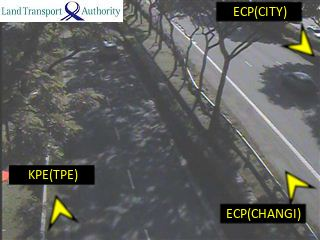

In [9]:
img_link_to_retrieve = surrounding_traffic_images_list[0]["ImageLink"]
img_link_to_retrieve
from IPython.display import display # For notebook purposes.
response = requests.get(img_link_to_retrieve, stream=True)
print(response)
try:
    img = Image.open(response.raw)
    display(img)
except UnidentifiedImageError:
    print("Unable to identify link as image file, hence image cannot be displayed ")


## BUS STOPS

Returns detailed information for all bus stops currently being serviced by
buses, including: Bus Stop Code, location coordinates.

In [10]:
busstop_url = "http://datamall2.mytransport.sg/ltaodataservice/BusStops"
busstop_api_response = api_query(api_link=busstop_url, agent_id="test", api_key=LTA_API_KEY)

busstop_list = busstop_api_response.get("value")

test_point = tuple([1.29685,103.853])
surrounding_busstop_list, nearest_busstop_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=busstop_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

len(surrounding_busstop_list)

Request successful with status code 200


1

In [11]:
nearest_busstop_list

{'BusStopCode': '01019',
 'RoadName': 'Victoria St',
 'Description': 'Bras Basah Cplx',
 'Latitude': 1.29698951191332,
 'Longitude': 103.85302201172507}

In [12]:
surrounding_busstop_list

[{'BusStopCode': '01012',
  'RoadName': 'Victoria St',
  'Description': 'Hotel Grand Pacific',
  'Latitude': 1.29684825487647,
  'Longitude': 103.85253591654006}]

## Taxi Stand

Returns detailed information of Taxi stands, such as location and whether is it
barrier free.

In [13]:
taxi_stand_url = "http://datamall2.mytransport.sg/ltaodataservice/TaxiStands"
taxi_stand_api_response = api_query(api_link=taxi_stand_url, agent_id="test", api_key=LTA_API_KEY)

taxi_stand_list = taxi_stand_api_response.get("value")

surrounding_taxi_stand_list, nearest_taxi_stand = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=taxi_stand_list, latitude_key_name="Latitude", longitude_key_name="Longitude")
print(len(surrounding_taxi_stand_list))
surrounding_taxi_stand_list

Request successful with status code 200
1


[{'TaxiCode': 'B06',
  'Latitude': 1.297702738,
  'Longitude': 103.8490929,
  'Bfa': 'Yes',
  'Ownership': 'Private',
  'Type': 'Stop',
  'Name': 'Bencoolen St at SMU School of Econ & Social Sciences'}]

## Bicycle parking

Returns bicycle parking locations within a radius. The default radius is
set as 0.5km


In [14]:
bicycle_parking_url = "http://datamall2.mytransport.sg/ltaodataservice/BicycleParkingv2"


# Pass in required lat/long/dist parameters
bicycle_parking_api_response = api_query(api_link=bicycle_parking_url, agent_id="test", api_key=LTA_API_KEY,  params_dict={"Lat":test_point[0], "Long": test_point[1], "Dist": radius})

bicycle_parking_list = bicycle_parking_api_response.get("value")

surrounding_bicycle_parking_list, nearest_bicycle_parking_list = geodesic_distance_filter(centre_point=test_point, radius_in_km=radius, data_list=bicycle_parking_list, latitude_key_name="Latitude", longitude_key_name="Longitude")

surrounding_bicycle_parking_list

Request successful with status code 200


[{'Description': '180264-1',
  'Latitude': 1.298938681288013,
  'Longitude': 103.85245488026638,
  'RackType': 'HDB_RACKS',
  'RackCount': 5,
  'ShelterIndicator': 'Y'}]

## TrafficSpeedBands
Returns current traffic speeds on expressways and arterial roads,
expressed in speed bands.


In [15]:

traffic_speed_band_url = "http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands"
traffic_speed_api_response = api_query(api_link=traffic_speed_band_url, agent_id="test", api_key=LTA_API_KEY)

traffic_speed_band_list = traffic_speed_api_response.get("value")
len(traffic_speed_band_list)

Request successful with status code 200


500

In [16]:
traffic_speed_band_list

[{'LinkID': '103000000',
  'RoadName': 'KENT ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 4,
  'MinimumSpeed': '30',
  'MaximumSpeed': '39',
  'StartLon': '103.85298052044503',
  'StartLat': '1.3170142376560023',
  'EndLon': '103.85259882242372',
  'EndLat': '1.3166840028663076'},
 {'LinkID': '103000010',
  'RoadName': 'BUCKLEY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 6,
  'MinimumSpeed': '50',
  'MaximumSpeed': '59',
  'StartLon': '103.84102305136321',
  'StartLat': '1.3166507852203482',
  'EndLon': '103.84022564204443',
  'EndLat': '1.316912438354752'},
 {'LinkID': '103000011',
  'RoadName': 'BUCKLEY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 8,
  'MinimumSpeed': '70',
  'MaximumSpeed': '999',
  'StartLon': '103.84022564204443',
  'StartLat': '1.316912438354752',
  'EndLon': '103.84102305136321',
  'EndLat': '1.3166507852203482'},
 {'LinkID': '103000014',
  'RoadName': 'SHREWSBURY ROAD',
  'RoadCategory': 'E',
  'SpeedBand': 5,
  'MinimumSpeed': '40',
  'MaximumSpeed': '49',
  

## Geospatial Bounds

Returns the SHP files of the requested geospatial layer. Refer to Annex E of the document on geospatial layer ID to be used as ID parameter.

In [21]:
geospatial_bound_url = "http://datamall2.mytransport.sg/ltaodataservice/GeospatialWholeIsland"
geospatial_bound_api_response = api_query(api_link=geospatial_bound_url, agent_id="test", api_key=LTA_API_KEY, params_dict={"ID": "ERPGantry"})
geospatial_layer_link = geospatial_bound_api_response.get("value")["0"].get("Link")
geospatial_layer_link

Request successful with status code 200


{'odata.metadata': 'http://datamall2.mytransport.sg/ltaodataservice/$metadata#GeospatialWholeIsland',
 'value': [{'Link': 'https://dmgeospatial.s3.ap-southeast-1.amazonaws.com/ERPGantry.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIL%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaDmFwLXNvdXRoZWFzdC0xIkcwRQIhAOCEeVaSHEv2dYPK%2FibaBexGz07nIqRBFZEyp1TDG4iPAiBvtzKhxvKhmVPbX8GAqQyTbCAk8X7mts07nwR%2BW5YogyrCBQg7EAQaDDM0MDY0NTM4MTMwNCIMnfQ4HUvFrLK2AhepKp8FkgkCViu3bfKaUuyzmW90eCgWC7%2FXhwWqKU7IjmfPjznk8S1s5XBYlXtwzJQx%2FlBhNZkgPZEADu5GTFRgStoz0Zj6c23355MNJLbdOrhSVpc3S5l2AWoUrqsdIqfVLCTUcY9Oqi%2BmwNM3cwYxHJDDbmiuz53s4BOFHpJRBjgf%2FwcK%2FYvAlBzrvduV9oKYSdaXzN3LVs6wooAYqxRU6RSSgxtYFIBVhliv6yGsv2O8xU2QyjjGyg60HSYU3YeCGQ8J23Rdvzxowlf82MkT5KtuCJrRwGgFH055yfgVPh%2Fg6A%2F2AO%2F01oI0O9x3ZabTE9z9s%2BF%2BYSAqD6oBVQy5dbT%2BRj0GxtHVvp0Q1BnBuAZlhpZxRclWrpMdofrgJimLR3mBM7o1rfLDj7q01Qo%2Fbbzbe7wE%2BZNzjhkVUKWbJotOVKMdhqxEEnqfAjdCesPdJLieTx%2BTW%2BPzwv%2FfsVmCEfG6w7lBIbi3xXoz8i1BdeglzTbWKFHHQperYTg3F9df62ECSK0GO8KWWMct0npItwYS4

## ERP Rates

Returns ERP rates of all vehicle types across all timings for each
zone
Refer to Annex D on ZoneID mapping

In [27]:
erp_rate_url = "http://datamall2.mytransport.sg/ltaodataservice/ERPRates"
erp_rate_api_response = api_query(api_link=erp_rate_url, agent_id="test", api_key=LTA_API_KEY)
erp_rate_link = erp_rate_api_response.get("value")
pd.DataFrame(erp_rate_link)

Request successful with status code 200


,VehicleType,DayType,StartTime,EndTime,ZoneID,ChargeAmount,EffectiveDate
0,Passenger Cars/Light Goods Vehicles/Taxis,Weekdays,07:00,08:00,AY1,0.0,2024-01-02
1,Passenger Cars/Light Goods Vehicles/Taxis,Weekdays,08:00,08:05,AY1,0.5,2024-01-02
2,Passenger Cars/Light Goods Vehicles/Taxis,Weekdays,08:05,08:30,AY1,1.0,2024-01-02
3,Passenger Cars/Light Goods Vehicles/Taxis,Weekdays,08:30,08:35,AY1,1.5,2024-01-02
4,Passenger Cars/Light Goods Vehicles/Taxis,Weekdays,08:35,08:55,AY1,2.0,2024-01-02
...,...,...,...,...,...,...,...
495,Light Goods Vehicles,Weekdays,17:30,18:00,CBD,0.0,2024-01-02
496,Light Goods Vehicles,Weekdays,18:00,18:05,CBD,0.0,2024-01-02
497,Light Goods Vehicles,Weekdays,18:05,18:25,CBD,0.0,2024-01-02
498,Light Goods Vehicles,Weekdays,18:25,18:30,CBD,0.0,2024-01-02
